# Cats and Dogs classifier

In [1]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from tensorflow.keras.utils import load_img

import shutil

2025-01-22 22:39:17.401600: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-22 22:39:17.406470: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-22 22:39:17.420456: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737581957.444694 1324529 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737581957.451559 1324529 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-22 22:39:17.477487: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

## 1. Get project files


In [2]:
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')


# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

--2025-01-22 22:39:21--  https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70702765 (67M) [application/zip]
Saving to: ‘cats_and_dogs.zip.1’

cats_and_dogs.zip.1 100%[===================>]  67.43M  11.1MB/s    in 6.1s    

2025-01-22 22:39:28 (11.0 MB/s) - ‘cats_and_dogs.zip.1’ saved [70702765/70702765]

Archive:  cats_and_dogs.zip
replace cats_and_dogs/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [5]:
test_data_dir = os.path.join(test_dir, 'test_data')
if not os.path.exists(test_data_dir):
    os.makedirs(test_data_dir)

# Move all files from 'test' to 'test_data'
for file_name in os.listdir(test_dir):
    file_path = os.path.join(test_dir, file_name)
    if os.path.isfile(file_path):  # Check if it's a file
        shutil.move(file_path, os.path.join(test_data_dir, file_name))

print("All files have been moved to 'test_data' successfully!")

All files have been moved to 'test_data' successfully!


## 2. Variables for pre-processing and training.


In [3]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

## 3. Set the model's variables

In [4]:
train_image_generator      = ImageDataGenerator(rescale=1.0/255)  # Rescale pixel values to [0, 1]
validation_image_generator = ImageDataGenerator(rescale=1.0/255)
test_image_generator       = ImageDataGenerator(rescale=1.0/255)

In [5]:
train_data_gen = train_image_generator.flow_from_directory(
    train_dir,                                # Path to the train directory
    target_size = (IMG_HEIGHT, IMG_WIDTH),    # Resize all images to (150, 150)
    class_mode = 'binary',                    # For binary classification (cats vs dogs)
    batch_size = batch_size,
)

val_data_gen = validation_image_generator.flow_from_directory(
    validation_dir,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode = 'binary',
    batch_size = batch_size,
)

# I made a light changing in the test directory where i added a directory named test_data
# and moved the files inside of it because flow from directory only takes files inside a directory
# in the selecteddirectory,
# Not sure that this is the best way to do so but it worked with me
test_data_gen = test_image_generator.flow_from_directory(
    test_dir,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode = None,
    batch_size = batch_size,
    shuffle=False
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


## 4. Plot five random training images

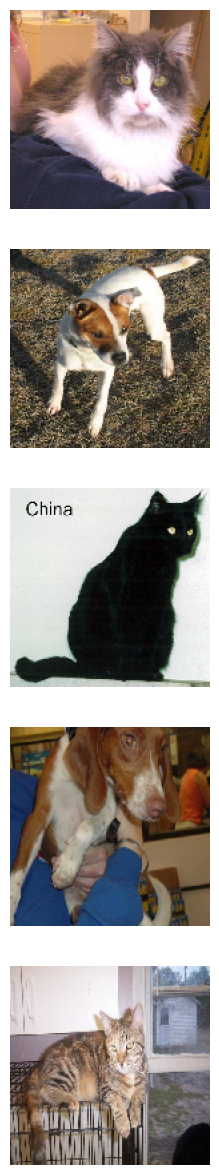

In [6]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


## 5. Creates a data generator object that transforms images

In [7]:
train_image_generator = ImageDataGenerator(
            rescale=1.0/255,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest'
          )

## 6. Generat the training data and printing one picure with 5 variatons

Found 2000 images belonging to 2 classes.


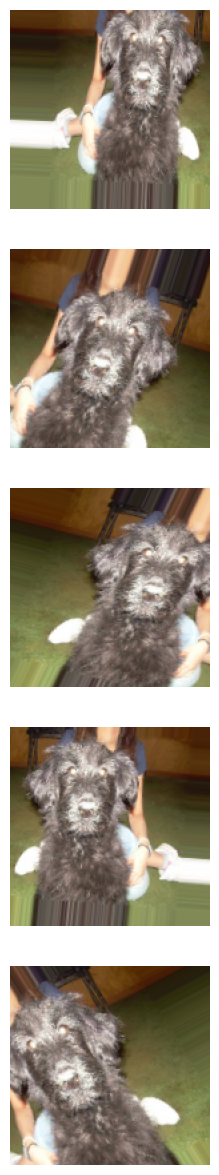

In [9]:
train_data_gen = train_image_generator.flow_from_directory(batch_size = batch_size,
                                                           directory=train_dir,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

## 7. Define the model

In [10]:
model = Sequential([
    # First convolutional layer with max pooling
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional layer with max pooling
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Third convolutional layer with max pooling
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the 3D feature maps to 1D for the dense layer
    Flatten(),

    # Fully connected (dense) layer
    Dense(512, activation='relu'),

    # Output layer: 1 unit with sigmoid activation (for binary classification)
    Dense(1, activation='sigmoid')
])



model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



model.summary()

/home/ocr8n/Documents/GitHub/FreeCodeCamp/Python - Machine Learning/Validation Projects/cap dog/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-01-22 22:41:12.896954: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-01-22 22:41:12.970143: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 75759616 exceeds 10% of free system memory.
2025-01-22 22:41:13.017572: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 75759616 exceeds 10% of free system memory.
2025-01-22 22:41:13.034546: W external/local_xla/xla/tsl/framework/cpu_allocator

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

## 8. Train the network

In [11]:
history = model.fit(
    train_data_gen,
    steps_per_epoch = len(train_data_gen),
    epochs = epochs,
    validation_data = val_data_gen,
    validation_steps=len(val_data_gen)
    )

/home/ocr8n/Documents/GitHub/FreeCodeCamp/Python - Machine Learning/Validation Projects/cap dog/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15


2025-01-22 22:41:23.682126: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 75759616 exceeds 10% of free system memory.
2025-01-22 22:41:25.230917: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 358875136 exceeds 10% of free system memory.


16/16 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.5122 - loss: 1.0056 - val_accuracy: 0.5030 - val_loss: 0.6901
Epoch 2/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.5211 - loss: 0.6887 - val_accuracy: 0.6110 - val_loss: 0.6679
Epoch 3/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.5729 - loss: 0.6717 - val_accuracy: 0.6280 - val_loss: 0.6414
Epoch 4/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.5859 - loss: 0.6607 - val_accuracy: 0.6150 - val_loss: 0.6337
Epoch 5/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.6284 - loss: 0.6393 - val_accuracy: 0.6710 - val_loss: 0.6048
Epoch 6/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.6557 - loss: 0.6124 - val_accuracy: 0.6780 - val_loss: 0.5808
Epoch 7/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.6696 - loss: 0.6035 - val_accuracy: 0.6910 - val_loss: 0.5746
Epoch 8/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.6812 - loss: 0.5907 - val_accuracy: 0.7020 - val_loss: 0.5594
Epo

## 9. Visualize the accuracy and loss of the model

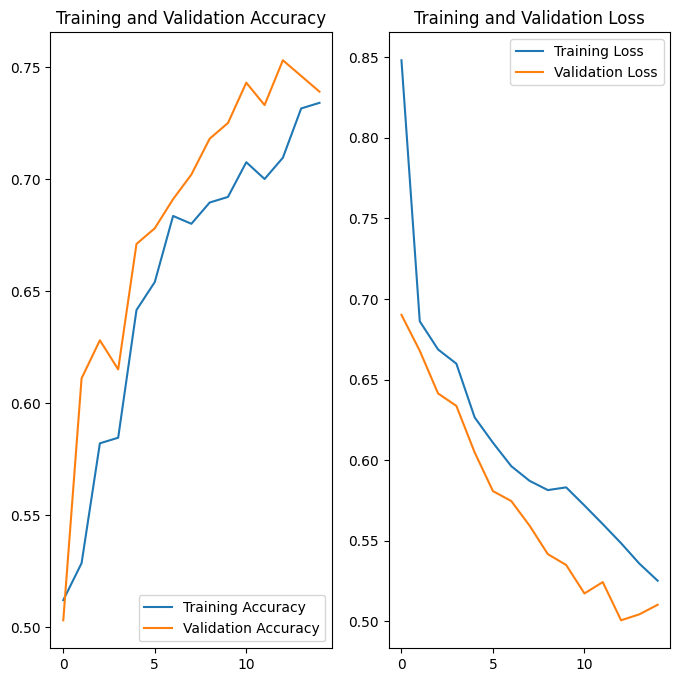

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## 10. Predict probabilities for the test images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


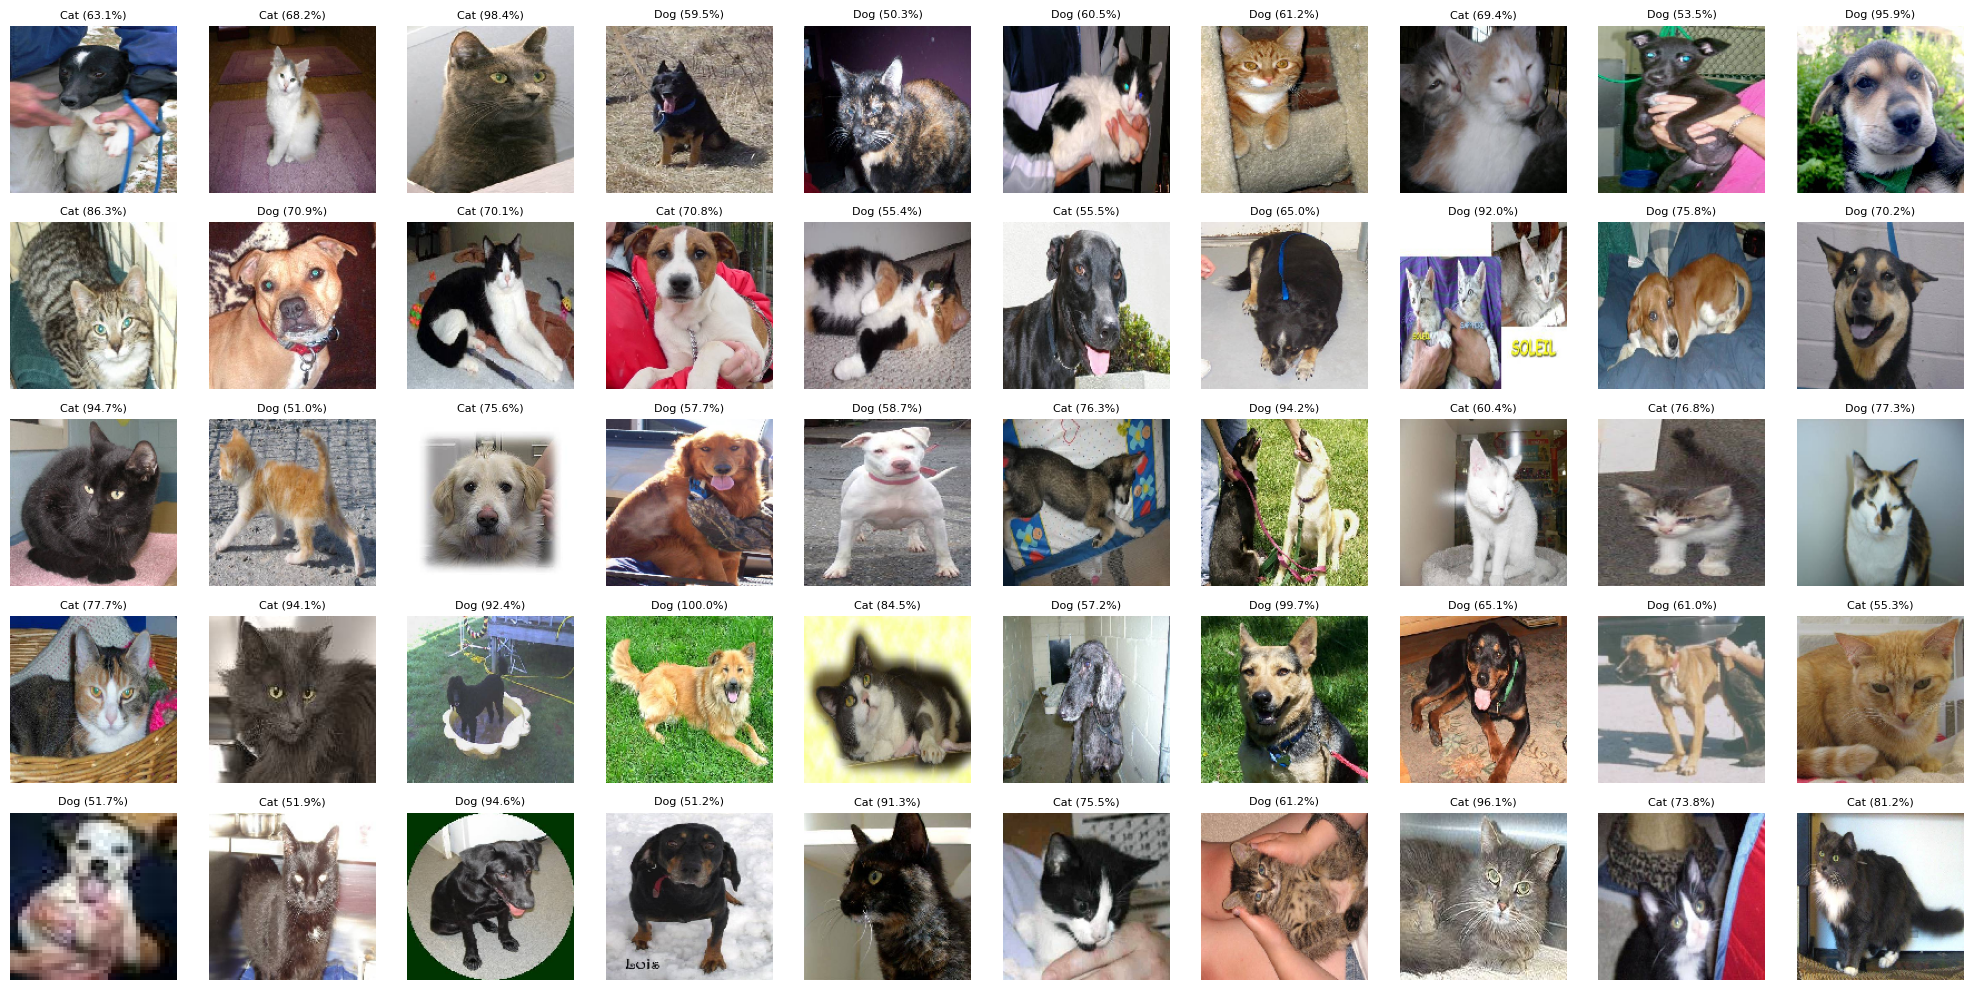

In [36]:
probabilities = model.predict(test_data_gen)

test_images = next(test_data_gen)

plotImages(test_images, probabilities)


## 11. Challenge passed ?

In [39]:
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(float(probability)) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 74.0% of the images of cats and dogs.
You passed the challenge!


/tmp/ipykernel_1324529/952477857.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  if round(float(probability)) == answer:
